In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
import requests
plt.rcParams["figure.figsize"] = (12,6)

# Value Investing

The ultimate goal is for our model to learn intrinsic value from independent variables and therefore predict if a stock ticker is under or over valued

### Exploratory Analysis
Simple plotting of the known variables to under the relationship between symbols and ratios

In [31]:
df = pd.read_csv("nasdaq100_metrics_ratios.csv")
df.head()

,symbol,company,sector,subsector,asset_turnover_2017,asset_turnover_2018,asset_turnover_2019,asset_turnover_2020,asset_turnover_2021,asset_turnover_2022,...,yoy_eps_growth_2021,yoy_eps_growth_2022,yoy_eps_growth_latest,yoy_revenue_growth_2017,yoy_revenue_growth_2018,yoy_revenue_growth_2019,yoy_revenue_growth_2020,yoy_revenue_growth_2021,yoy_revenue_growth_2022,yoy_revenue_growth_latest
0,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals",0.66,0.72,0.74,0.83,1.08,NaN,...,71.04,NaN,-7.69,11.34,21.69,5.36,11.94,38.50,NaN,5.11
1,ABNB,Airbnb,Consumer Discretionary,Internet & Direct Marketing Retail,NaN,0.55,0.64,0.36,0.50,NaN,...,96.46,NaN,609.09,NaN,40.08,31.58,31.27,-18.11,NaN,41.00
2,ADBE,Adobe Inc.,Information Technology,Application Software,0.54,0.54,0.57,0.57,0.61,NaN,...,-7.48,NaN,-3.97,25.51,24.45,25.21,16.86,23.69,NaN,15.54
3,ADI,Analog Devices,Information Technology,Semiconductors,0.36,0.30,0.29,0.26,0.20,NaN,...,5.49,NaN,6.67,36.64,10.91,-3.22,-6.25,21.07,NaN,26.30
4,ADP,ADP,Information Technology,Data Processing & Outsourced Services,NaN,0.34,0.34,0.35,0.33,0.29,...,6.49,15.32,19.05,NaN,8.65,7.16,4.84,4.95,11.87,12.02


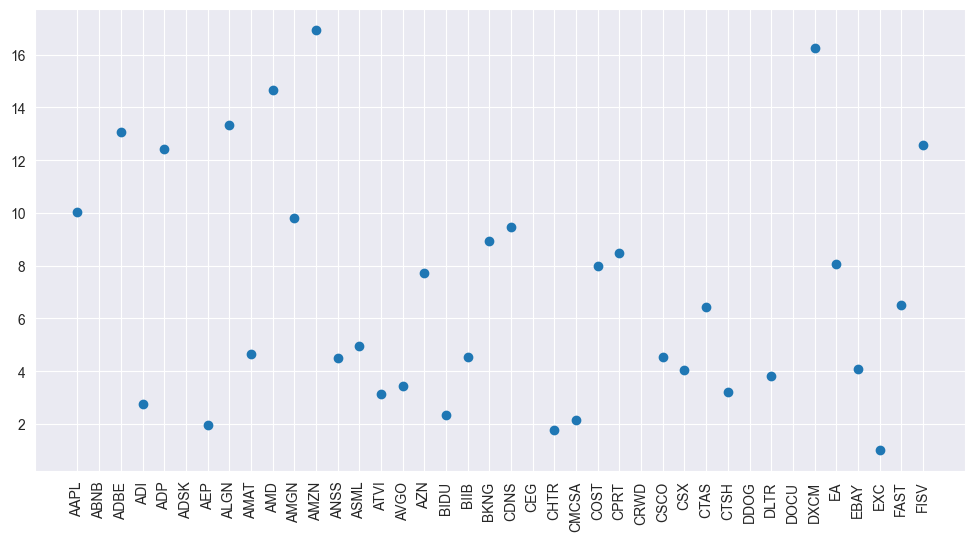

In [32]:
plt.scatter(df['symbol'].iloc[:40],df['price_to_book_ratio_2018'].iloc[:40])
plt.xticks(rotation=90)
plt.show()

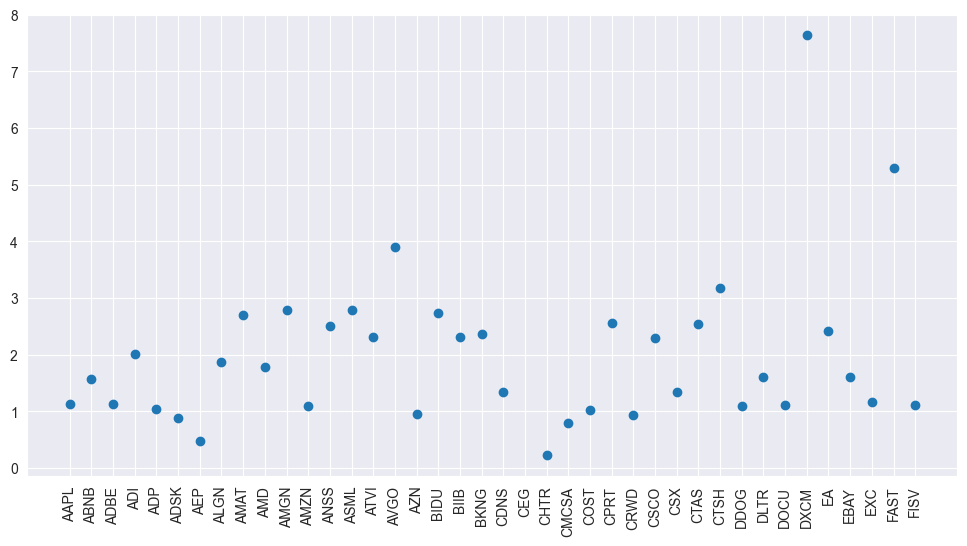

In [33]:
plt.scatter(df['symbol'].iloc[:40],df['current_ratio_2018'].iloc[:40])
plt.xticks(rotation=90)
plt.show()

## Data Cleaning / Transformation

In [34]:
prices = []
for index, row in df.iterrows():
    try:
        df_tmp = pd.read_csv(f"./stocks/{row['symbol']}.csv")
        df_tmp.set_index('Date', inplace=True)
        prices.append([df_tmp.loc['2018-01-02']["Close"],df_tmp.loc['2019-12-31']["Close"]])
    except:
        prices.append([np.nan, np.nan])
print(df_tmp.loc['2019-12-31'])
print(prices)


Open         4.611000e+01
High         4.670900e+01
Low          4.585000e+01
Close        4.650000e+01
Adj Close    4.650000e+01
Volume       1.256300e+06
Name: 2019-12-31, dtype: float64
[[np.float64(172.25999450683594), np.float64(293.6499938964844)], [nan, nan], [np.float64(177.6999969482422), np.float64(329.8099975585937)], [np.float64(90.27999877929688), np.float64(118.83999633789062)], [np.float64(115.98999786376952), np.float64(170.5)], [np.float64(107.12000274658205), np.float64(183.4600067138672)], [np.float64(72.41000366210938), np.float64(94.51000213623048)], [np.float64(224.6199951171875), np.float64(279.0400085449219)], [np.float64(53.040000915527344), np.float64(61.040000915527344)], [np.float64(10.979999542236328), np.float64(45.86000061035156)], [np.float64(177.0), np.float64(241.07000732421875)], [np.float64(1189.010009765625), np.float64(1847.8399658203125)], [np.float64(148.5500030517578), np.float64(257.4100036621094)], [np.float64(177.72999572753906), np.float64(2

In [35]:
tmpDf = pd.DataFrame(prices)
new_df = pd.concat([tmpDf,df], axis=1)
new_df.head()

,0,1,symbol,company,sector,subsector,asset_turnover_2017,asset_turnover_2018,asset_turnover_2019,asset_turnover_2020,...,yoy_eps_growth_2021,yoy_eps_growth_2022,yoy_eps_growth_latest,yoy_revenue_growth_2017,yoy_revenue_growth_2018,yoy_revenue_growth_2019,yoy_revenue_growth_2020,yoy_revenue_growth_2021,yoy_revenue_growth_2022,yoy_revenue_growth_latest
0,172.259995,293.649994,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals",0.66,0.72,0.74,0.83,...,71.04,NaN,-7.69,11.34,21.69,5.36,11.94,38.50,NaN,5.11
1,NaN,NaN,ABNB,Airbnb,Consumer Discretionary,Internet & Direct Marketing Retail,NaN,0.55,0.64,0.36,...,96.46,NaN,609.09,NaN,40.08,31.58,31.27,-18.11,NaN,41.00
2,177.699997,329.809998,ADBE,Adobe Inc.,Information Technology,Application Software,0.54,0.54,0.57,0.57,...,-7.48,NaN,-3.97,25.51,24.45,25.21,16.86,23.69,NaN,15.54
3,90.279999,118.839996,ADI,Analog Devices,Information Technology,Semiconductors,0.36,0.30,0.29,0.26,...,5.49,NaN,6.67,36.64,10.91,-3.22,-6.25,21.07,NaN,26.30
4,115.989998,170.500000,ADP,ADP,Information Technology,Data Processing & Outsourced Services,NaN,0.34,0.34,0.35,...,6.49,15.32,19.05,NaN,8.65,7.16,4.84,4.95,11.87,12.02


In [36]:
new_df.insert(loc=0, column='eps2018', value=(new_df.iloc[:,0]/new_df['price_to_earnings_ratio_2018']))
new_df.insert(loc=0, column='eps2019', value=(new_df.iloc[:,2]/new_df['price_to_earnings_ratio_2019']))

In [37]:
new_df.head(100)

,eps2019,eps2018,0,1,symbol,company,sector,subsector,asset_turnover_2017,asset_turnover_2018,...,yoy_eps_growth_2021,yoy_eps_growth_2022,yoy_eps_growth_latest,yoy_revenue_growth_2017,yoy_revenue_growth_2018,yoy_revenue_growth_2019,yoy_revenue_growth_2020,yoy_revenue_growth_2021,yoy_revenue_growth_2022,yoy_revenue_growth_latest
0,15.578249,9.095037,172.259995,293.649994,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals",0.66,0.72,...,71.04,NaN,-7.69,11.34,21.69,5.36,11.94,38.50,NaN,5.11
1,NaN,NaN,NaN,NaN,ABNB,Airbnb,Consumer Discretionary,Internet & Direct Marketing Retail,NaN,0.55,...,96.46,NaN,609.09,NaN,40.08,31.58,31.27,-18.11,NaN,41.00
2,6.392906,3.682901,177.699997,329.809998,ADBE,Adobe Inc.,Information Technology,Application Software,0.54,0.54,...,-7.48,NaN,-3.97,25.51,24.45,25.21,16.86,23.69,NaN,15.54
3,4.068470,4.313426,90.279999,118.839996,ADI,Analog Devices,Information Technology,Semiconductors,0.36,0.30,...,5.49,NaN,6.67,36.64,10.91,-3.22,-6.25,21.07,NaN,26.30
4,5.404120,3.675222,115.989998,170.500000,ADP,ADP,Information Technology,Data Processing & Outsourced Services,NaN,0.34,...,6.49,15.32,19.05,NaN,8.65,7.16,4.84,4.95,11.87,12.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5.150494,3.506406,109.470001,192.679993,VRSN,Verisign,Information Technology,Internet Services & Infrastructure,0.44,0.50,...,-0.99,NaN,17.56,5.83,5.57,4.52,5.98,7.87,NaN,10.45
96,4.509784,7.466309,152.910004,218.949997,VRTX,Vertex Pharmaceuticals,Health Care,Biotechnology,0.77,0.62,...,-12.44,NaN,1103.85,41.27,19.64,35.81,47.55,23.70,NaN,23.55
97,4.962963,5.519146,74.949997,58.959999,WBA,Walgreens Boots Alliance,Consumer Staples,Drug Retail,1.71,1.96,...,463.46,NaN,-76.09,1.91,20.61,-1.65,6.57,10.37,NaN,-4.02
98,NaN,NaN,103.400002,164.449997,WDAY,"Workday, Inc.",Information Technology,Application Software,NaN,0.52,...,43.87,110.08,-160.98,NaN,29.85,26.22,22.65,14.10,11.04,24.57


# Ln(x) the dependent variable for a better fit

In [38]:
fairValue = []
for index, row in new_df.iterrows():
    eps_growth = (row['eps2019'] - row['eps2018'])/row['eps2018']
    if np.isnan(eps_growth):
        fairValue.append([np.nan])
    elif eps_growth <= .05:
        epsTTM = row['eps2019'] * 5
        fairValue.append([epsTTM])
    elif eps_growth <= .25:
        epsTTM = row['eps2019'] * eps_growth*100
        fairValue.append([epsTTM])
    elif eps_growth > .25:
        eps_percent = 25
        epsTTM = row['eps2019'] * eps_percent
        fairValue.append([epsTTM])

print(fairValue)

[[389.4562253269023], [nan], [159.82263886343947], [20.342347883925132], [135.10301109350237], [nan], [19.39860470776488], [27.64962431083253], [16.08856112691812], [7.499836562169092], [157.8967560880617], [575.5076509967337], [26.250255319407444], [34.50792938915651], [9.750574034943439], [34.69696849074131], [2.575945474806342], [3.9898990380643595], [785.8315968917589], [2794.9509804963936], [88.24427558568901], [nan], [123.25694619797207], [14.150409446413821], [205.88401052657215], [72.12880904299352], [nan], [nan], [82.467480261063], [242.32707724447553], [16.45092850338559], [nan], [nan], [nan], [nan], [59.28628791380247], [10.448495546976723], [105.53240776062012], [6.8988052208624815], [8.54998500838642], [47.49955603142485], [21.097403687316103], [498.2192360056963], [467.20743410613716], [42.042755344418055], [122.25187494513693], [168.4985728537053], [25.119184253855227], [139.08771913539786], [288.76026983883474], [nan], [4.399696164580464], [nan], [282.27186021696025], [

In [39]:
fairValuedf = pd.DataFrame(np.array(fairValue))
new_df.insert(loc=0, column='Fair Value', value=fairValuedf)

In [40]:
new_df.head(100)

,Fair Value,eps2019,eps2018,0,1,symbol,company,sector,subsector,asset_turnover_2017,...,yoy_eps_growth_2021,yoy_eps_growth_2022,yoy_eps_growth_latest,yoy_revenue_growth_2017,yoy_revenue_growth_2018,yoy_revenue_growth_2019,yoy_revenue_growth_2020,yoy_revenue_growth_2021,yoy_revenue_growth_2022,yoy_revenue_growth_latest
0,389.456225,15.578249,9.095037,172.259995,293.649994,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals",0.66,...,71.04,NaN,-7.69,11.34,21.69,5.36,11.94,38.50,NaN,5.11
1,NaN,NaN,NaN,NaN,NaN,ABNB,Airbnb,Consumer Discretionary,Internet & Direct Marketing Retail,NaN,...,96.46,NaN,609.09,NaN,40.08,31.58,31.27,-18.11,NaN,41.00
2,159.822639,6.392906,3.682901,177.699997,329.809998,ADBE,Adobe Inc.,Information Technology,Application Software,0.54,...,-7.48,NaN,-3.97,25.51,24.45,25.21,16.86,23.69,NaN,15.54
3,20.342348,4.068470,4.313426,90.279999,118.839996,ADI,Analog Devices,Information Technology,Semiconductors,0.36,...,5.49,NaN,6.67,36.64,10.91,-3.22,-6.25,21.07,NaN,26.30
4,135.103011,5.404120,3.675222,115.989998,170.500000,ADP,ADP,Information Technology,Data Processing & Outsourced Services,NaN,...,6.49,15.32,19.05,NaN,8.65,7.16,4.84,4.95,11.87,12.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,128.762358,5.150494,3.506406,109.470001,192.679993,VRSN,Verisign,Information Technology,Internet Services & Infrastructure,0.44,...,-0.99,NaN,17.56,5.83,5.57,4.52,5.98,7.87,NaN,10.45
96,22.548918,4.509784,7.466309,152.910004,218.949997,VRTX,Vertex Pharmaceuticals,Health Care,Biotechnology,0.77,...,-12.44,NaN,1103.85,41.27,19.64,35.81,47.55,23.70,NaN,23.55
97,24.814814,4.962963,5.519146,74.949997,58.959999,WBA,Walgreens Boots Alliance,Consumer Staples,Drug Retail,1.71,...,463.46,NaN,-76.09,1.91,20.61,-1.65,6.57,10.37,NaN,-4.02
98,NaN,NaN,NaN,103.400002,164.449997,WDAY,"Workday, Inc.",Information Technology,Application Software,NaN,...,43.87,110.08,-160.98,NaN,29.85,26.22,22.65,14.10,11.04,24.57
